In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#Reading ths dataset
df = pd.read_csv("C:/Users/bohras/Desktop/INC- Cluster/incident_test.csv", encoding= "unicode_escape")
df.head()

,number,actions_taken,active,activity_due,additional_assignee_list,approval,approval_history,approval_set,assigned_to,assignment_group,...,watch_list,work_notes,work_notes_list,u_date_time,u_request_item,u_response_sla,u_sio_count,u_app_name,u_application_owner,u_support_group
0,INC0093707,NaN,False,UNKNOWN,NaN,Not Yet Requested,NaN,NaN,swarajya.kalapatapu@hpe.com,GIT-AppOps-FIN-FICO,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
1,INC0098336,NaN,False,UNKNOWN,NaN,Not Yet Requested,NaN,NaN,purnendu.mohanty@hpe.com,DEL-APPOPS-S4_SALESOPS,...,NaN,2021-03-15 23:28:53 - Madhur Agrawal (Work not...,NaN,NaN,NaN,True,NaN,NaN,NaN,Deals
2,INC0098383,NaN,False,UNKNOWN,NaN,Not Yet Requested,NaN,NaN,swarajya.kalapatapu@hpe.com,GIT-AppOps-FIN-FICO,...,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
3,INC0099773,NaN,False,UNKNOWN,NaN,Not Yet Requested,NaN,NaN,vaibhav.jaggi@hpe.com,GIT-InfraOps-Chef,...,NaN,2021-03-19 08:32:00 - Vaibhav Jaggi (Work note...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN
4,INC0099827,NaN,False,UNKNOWN,NaN,Not Yet Requested,NaN,NaN,swarajya.kalapatapu@hpe.com,GIT-AppOps-FIN-FICO,...,NaN,2020-06-08 15:03:56 - Swarajya Kalapatapu (Wor...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN


In [3]:
#finding out the indices of required columns 
index_priority = df.columns.get_loc("priority")
print("priority: {}".format(index_priority))
index_urgency = df.columns.get_loc("urgency")
print("urgency: {}".format(index_urgency))
index_calendar_duration = df.columns.get_loc("calendar_duration")
print("calendar_duration: {}".format(index_calendar_duration))

priority: 97
urgency: 142
calendar_duration: 49


In [4]:
#Converting non-numeric values into numerical values
df['priority'] = df['priority'].replace(['1 - Critical',  '2 - High', '3 - Moderate', '4 - Low'], [1, 2, 3, 4])
df['urgency'] = df['urgency'].replace(['1 - Immediate', '2 - Today', '3 - Within 3 Days', '4 - Within a week'],
                                          [1,2,3,4])

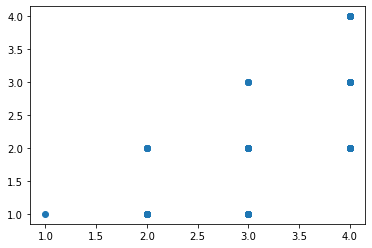

In [5]:
#Scatterplot of priority v/s urgency
plt.scatter(df['priority'],df['urgency'])

# In above plot 1, 2, 3 and 4 represents 1 - Critical, 2 - High, 3 - Moderate and 4 - Low... "priority" column values respectively

<AxesSubplot:xlabel='urgency', ylabel='calendar_duration'>

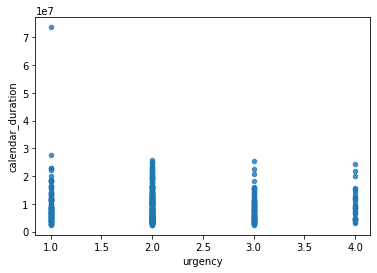

In [6]:
df.plot(kind='scatter', x='urgency', y='calendar_duration', alpha=0.8)

# In above plot 1, 2, 3 and 4 represents 1 - Immediate, 2 - Today, 3 - Within 3 Days and 4 - Within a week... "urgency" values respectively

In [7]:
#Creating required dataframe out of the given dataframe
df = pd.DataFrame(df, columns = ['priority', 'urgency', 'calendar_duration'])

In [8]:
df.head()

,priority,urgency,calendar_duration
0,2,2,24974128
1,4,2,25924033
2,3,3,25288520
3,4,2,24529822
4,4,2,23150507


In [9]:
scaler = MinMaxScaler()
model=scaler.fit(df)
scaled_data=model.transform(df)

In [10]:
df = pd.DataFrame(scaled_data, columns =['priority', 'urgency', 'calendar_duration'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,priority,urgency,calendar_duration
0,0.333333,0.333333,3.169070e-01
1,1.000000,0.333333,3.302413e-01
2,0.666667,0.666667,3.213203e-01
3,1.000000,0.333333,3.106700e-01
4,1.000000,0.333333,2.913078e-01
...,...,...,...
494,1.000000,0.333333,1.732457e-02
495,0.666667,0.000000,3.846207e-02
496,1.000000,0.666667,4.989891e-02
497,1.000000,0.666667,3.796820e-03


In [11]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['priority', 'calendar_duration']])
    sse.append(km.inertia_)

C:\Users\bohras\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


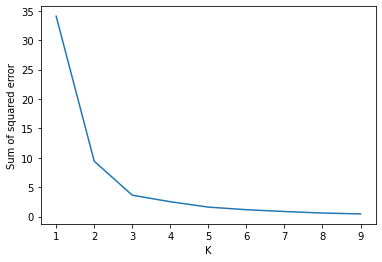

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
km = KMeans(n_clusters = 4, random_state = 0)
km

KMeans(n_clusters=4, random_state=0)

In [14]:
y_predicted = km.fit_predict(df[['priority','calendar_duration']])
y_predicted

array([2, 3, 0, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3,
       0, 2, 3, 3, 2, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 0, 3, 0, 0, 3, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3,
       2, 0, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 0, 3, 3, 2, 2, 0, 2, 3, 3, 0, 3, 1, 1, 0,
       2, 1, 3, 3, 0, 0, 2, 1, 3, 3, 0, 1, 0, 3, 1, 0, 1, 1, 3, 0, 3, 1,
       0, 0, 0, 0, 3, 1, 0, 1, 1, 3, 2, 0, 1, 1, 0, 0, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 2, 3, 0, 0, 1, 2, 0, 3, 1, 1, 0, 2, 0, 1, 3, 1, 1, 1, 0,
       0, 3, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 3, 1, 1, 1, 2, 0, 0, 1, 2, 0,
       1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 3,
       1, 2, 2, 2, 2, 1, 1, 0, 0, 3, 1, 1, 1, 3, 0, 1, 3, 0, 1, 2, 2, 3,
       0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 3, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0,
       0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 3, 0, 1, 0, 1,

In [15]:
df['cluster'] = y_predicted
df.head()

,priority,urgency,calendar_duration,cluster
0,0.333333,0.333333,0.316907,2
1,1.000000,0.333333,0.330241,3
2,0.666667,0.666667,0.321320,0
3,1.000000,0.333333,0.310670,3
4,1.000000,0.333333,0.291308,3


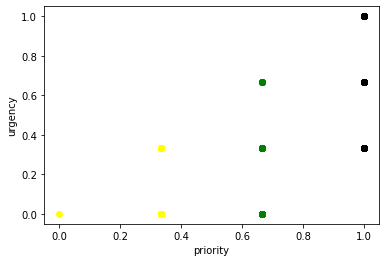

In [16]:
a = df[df.cluster==0]
b = df[df.cluster==1]
c = df[df.cluster==2]
d = df[df.cluster==3]

plt.scatter(a.priority,a['urgency'],color='green')
plt.scatter(b.priority,b['urgency'],color='red')
plt.scatter(c.priority,c['urgency'],color='yellow')
plt.scatter(d.priority,d['urgency'],color='black')

plt.xlabel('priority')
plt.ylabel('urgency')
plt.show()


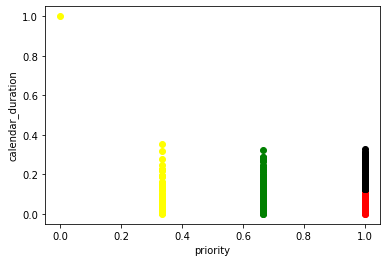

In [17]:
e = df[df.cluster==0]
f = df[df.cluster==1]
g = df[df.cluster==2]
h = df[df.cluster==3]

plt.scatter(e.priority,a['calendar_duration'],color='green')
plt.scatter(f.priority,b['calendar_duration'],color='red')
plt.scatter(g.priority,c['calendar_duration'],color='yellow')
plt.scatter(h.priority,d['calendar_duration'],color='black')

plt.xlabel('priority')
plt.ylabel('calendar_duration')
plt.show()

## Important Conclusions:
   Note: Here green represents cluster 0, red represents cluster 1 , yellow represents cluster 2 and black represents cluster 3
1. A large number of records under cluster 2 have low to considerable calendar_duration.
2. Few records from cluster 2 have exceptionally high calendar_duration.
3. Data distribution behaviour of cluster 0 and cluster 2 is somewhat similar.
4. Records under cluster 1 have considerably low calendar_duration 
5. Records under cluster 3 have considerable calendar_duration and as seen in the above clustering distribution 
   the relation can be written as:
   calendar_duration (cluster 0) < calendar_duration (cluster 3) < calendar_duration (cluster 2)

In [18]:
df.dtypes

priority             float64
urgency              float64
calendar_duration    float64
cluster                int32
dtype: object

## Supervised Approach (just an illustration): Regression architecture to predict calendar_duration

In [19]:
df.head(10)

,priority,urgency,calendar_duration,cluster
0,0.333333,0.333333,0.316907,2
1,1.000000,0.333333,0.330241,3
2,0.666667,0.666667,0.321320,0
3,1.000000,0.333333,0.310670,3
4,1.000000,0.333333,0.291308,3
5,1.000000,0.333333,0.292409,3
6,0.333333,0.000000,0.352870,2
7,1.000000,0.333333,0.289957,3
8,0.333333,0.333333,0.279150,2
9,1.000000,0.333333,0.314893,3


# To find the correlation between columns of the dataframe

In [20]:
corr_matrix = df.corr()

In [21]:
corr_matrix['calendar_duration'].sort_values(ascending = False)

calendar_duration    1.000000
cluster              0.427772
priority            -0.012054
urgency             -0.060775
Name: calendar_duration, dtype: float64

In [22]:
X = df.drop('calendar_duration',axis=1)

In [23]:
y = df['calendar_duration']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(399, 3)

In [26]:
X_test.shape

(100, 3)

In [27]:
y_test

460    0.012359
73     0.144835
231    0.067820
175    0.085008
237    0.103927
         ...   
247    0.075107
384    0.042999
19     0.223642
321    0.028093
331    0.034693
Name: calendar_duration, Length: 100, dtype: float64

In [28]:
#from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


#model=LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
pred = model.predict(X_test)

In [30]:
pred

array([0.08131281, 0.09151032, 0.05471826, 0.10766106, 0.08131281,
       0.05471826, 0.05471826, 0.08131281, 0.08131281, 0.19028432,
       0.1734375 , 0.05415644, 0.05415644, 0.09151032, 0.08131281,
       0.05471826, 0.08131281, 0.1734375 , 0.05415644, 0.1734375 ,
       0.05471826, 0.09151032, 0.08131281, 0.10766106, 0.10766106,
       0.1734375 , 0.10766106, 0.09151032, 0.08131281, 0.19028432,
       0.08131281, 0.19028432, 0.05415644, 0.10568843, 0.05415644,
       0.10766106, 0.09151032, 0.05471826, 0.08131281, 0.09151032,
       0.05471826, 0.05471826, 0.19028432, 0.05471826, 0.12838739,
       0.17734028, 0.19028432, 0.05415644, 0.05471826, 0.08131281,
       0.05415644, 0.12838739, 0.08131281, 0.05415644, 0.19028432,
       0.05471826, 0.09151032, 0.05471826, 0.05415644, 0.08131281,
       0.1734375 , 0.09151032, 0.10766106, 0.08131281, 0.09151032,
       0.09151032, 0.05471826, 0.19028432, 0.05415644, 0.08131281,
       0.05894398, 0.08131281, 0.19028432, 0.19028432, 0.08131

In [31]:
from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(y_test,pred))

R2 Score:  0.42062462332190154


In [32]:
from sklearn.metrics import mean_squared_error
print("RMSE score: ", np.sqrt(mean_squared_error(y_test,pred)))

RMSE score:  0.061763654550833255
